In [1]:
# Loading required packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
# Setting default options
pd.set_option("mode.copy_on_write", True)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Loading required  data
df = pd.read_csv("../01_Data/01_Raw/nhis.csv.zip", compression="zip")
df.sample(5)

/var/folders/cj/jkp7xyld4_q3x3rk7xdx7jwh0000gn/T/ipykernel_4980/493222604.py:2: DtypeWarning: Columns (4,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../01_Data/01_Raw/nhis.csv.zip", compression="zip")


,YEAR,SERIAL,STRATA,PSU,NHISHID,HHWEIGHT,REGION,PERNUM,NHISPID,HHX,...,SMKECIGRND,CIGAREV,CIGARDAYSMO,CIGAR50LIFE,CIGARFREQNOW,PIPEV,PIPEFREQNOW,NONCIGEV,NONCIGNOW,TOBLSYR
83947,2000,35960,5222,2,2000060342,2491.0,2,1,20000603420101,60342,...,NaN,1.0,96.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN
987290,2011,1452,6204,2,2011002157,1244.0,3,1,20110021570101,2157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308634,2014,5362,6044,1,2014007730,626.0,1,5,20140077300105,7730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1308719,2014,5417,6256,2,2014007814,2579.0,4,1,20140078140101,7814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
728840,2007,32430,6270,2,2007052023,1268.0,4,2,20070520230102,52023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# check values in CNLUNG
df["CNLUNG"].value_counts()

CNLUNG
0    1849834
1      61839
2       2049
9        238
7        105
Name: count, dtype: int64

In [5]:
# Subsetting the required columns, filternring for CNLUNG as 1 or 2
df_2 = df.loc[
    df["CNLUNG"].isin([1, 2]), ["YEAR", "CNLUNG", "ALCSTAT1", "SMOKESTATUS2", "SEX"]
]
df_2.sample(5)

,YEAR,CNLUNG,ALCSTAT1,SMOKESTATUS2,SEX
1873283,2021,1,NaN,30,2
1135775,2012,1,1.0,30,1
1441603,2015,1,1.0,20,1
1765765,2019,1,NaN,30,2
1829554,2020,1,3.0,30,2


In [6]:
# New Column to encode alcohol status
def map_alc(x):
    if x == 1:
        return "No"
    elif x == 2 or x == 3:
        return "Yes"
    else:
        return "Other"


df_2["ALC"] = df_2["ALCSTAT1"].apply(map_alc)

In [7]:
df_2["ALC"].value_counts()

ALC
Yes      45490
No        9978
Other     8420
Name: count, dtype: int64

In [8]:
# Proportion of CNLUNG=1 by ALCSTAT1 year wise, line plot
proportion_by_alc_year = (
    df_2.loc[df_2["ALC"].isin(["Yes", "No"]), :]
    .groupby(["YEAR", "ALC"])["CNLUNG"]
    .apply(lambda x: (x == 2).mean())
    .unstack()
)
proportion_by_alc_year

ALC,No,Yes
YEAR,,
2000,0.023529,0.023632
2001,0.017204,0.036364
2002,0.040169,0.035138
2003,0.050526,0.038913
2004,0.028736,0.033391
2005,0.028143,0.028007
2006,0.032520,0.035633
2007,0.033058,0.040411
2008,0.029268,0.026580


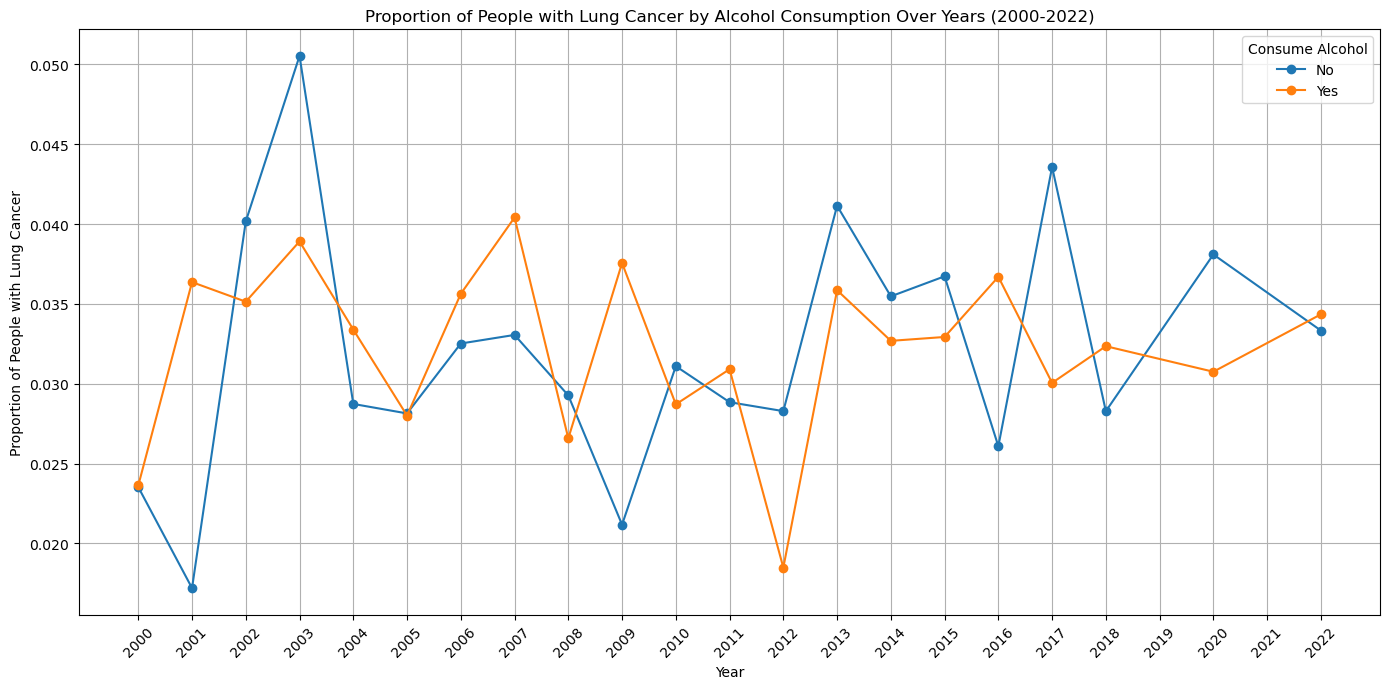

In [16]:
# Plotting
plt.figure(figsize=(14, 7))

for alc in proportion_by_alc_year.columns:
    label = alc
    plt.plot(
        proportion_by_alc_year.index,
        proportion_by_alc_year[alc],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title(
    "Proportion of People with Lung Cancer by Alcohol Consumption Over Years (2000-2022)"
)
plt.xlabel("Year")
plt.ylabel("Proportion of People with Lung Cancer")
plt.legend(title="Consume Alcohol")
plt.grid(True)
plt.xticks(range(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()

In [10]:
def map_smoke(x):
    if x == 30:
        return "No"
    elif x in [90, 00]:
        return "Other"
    else:
        return "Yes"

In [13]:
df_2["SMK"] = df_2["SMOKESTATUS2"].apply(map_smoke)
df_2["SMK"].value_counts()

SMK
Yes      32723
No       30506
Other      659
Name: count, dtype: int64

In [14]:
# Proportion of CNLUNG=1 by ALCSTAT1 year wise, line plot
proportion_by_smk_year = (
    df_2.loc[df_2["SMK"].isin(["Yes", "No"]), :]
    .groupby(["YEAR", "SMK"])["CNLUNG"]
    .apply(lambda x: (x == 2).mean())
    .unstack()
)
proportion_by_smk_year

SMK,No,Yes
YEAR,,
2000,0.012474,0.032368
2001,0.003976,0.055556
2002,0.013904,0.051898
2003,0.014115,0.063545
2004,0.011331,0.050000
2005,0.009208,0.042879
2006,0.010652,0.052960
2007,0.022500,0.053135
2008,0.011682,0.040456


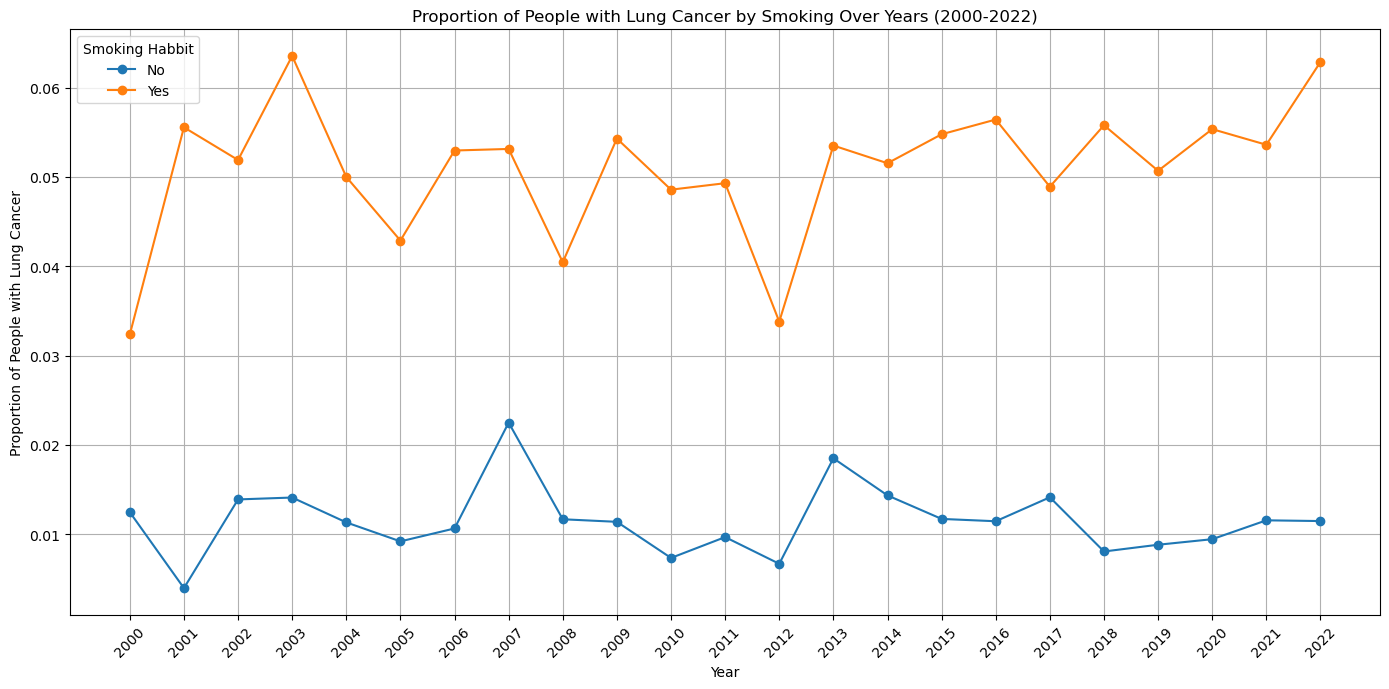

In [17]:
# Plotting
plt.figure(figsize=(14, 7))

for smk in proportion_by_smk_year.columns:
    label = smk
    plt.plot(
        proportion_by_smk_year.index,
        proportion_by_smk_year[smk],
        marker="o",
        linestyle="-",
        label=label,
    )

plt.title("Proportion of People with Lung Cancer by Smoking Over Years (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Proportion of People with Lung Cancer")
plt.legend(title="Smoking Habbit")
plt.grid(True)
plt.xticks(range(2000, 2023), rotation=45)
plt.tight_layout()
plt.show()